In [4]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from wordcloud import WordCloud

from collections import Counter
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

import pickle

## EXPLORATORY DATA ANALYSIS

### 1. Most common words

In [5]:
# Opening DTM
grouped_sotu_dtm = pd.read_pickle('./pickled_files/grouped_pres_speeches_dtm.pkl')
grouped_sotu_dtm.head()

,aa,aaa,aana,aaron,abandon,abandoned,abandonedan,abandonedfor,abandonedif,abandonedthe,...,zimbabwe,zinc,zion,zollverein,zone,zones,zoological,zooming,zuloaga,ôtil
president_name,,,,,,,,,,,,,,,,,,,,,
Abraham Lincoln,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andrew Jackson,0,0,0,0,6,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andrew Johnson,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Barack Obama,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Benjamin Harrison,0,0,0,0,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Transposing dataframe
transposed_dtm = grouped_sotu_dtm.T
transposed_dtm.head()

president_name,Abraham Lincoln,Andrew Jackson,Andrew Johnson,Barack Obama,Benjamin Harrison,Calvin Coolidge,Chester A. Arthur,Donald J. Trump,Dwight D. Eisenhower,Franklin D. Roosevelt,...,Rutherford B. Hayes,Theodore Roosevelt,Thomas Jefferson,Ulysses S. Grant,Warren G. Harding,William Howard Taft,William J. Clinton,William McKinley,Woodrow Wilson,Zachary Taylor
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aana,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaron,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,2,0,0,0
abandon,1,6,1,2,1,3,0,1,1,5,...,1,9,0,3,0,3,2,1,0,1


In [7]:
# Finding the most commonly used words by each president
top_words_dict = {}
for col in transposed_dtm.columns:
    top_word = transposed_dtm[col].sort_values(ascending=False).head(30)
    top_words_dict[col] = list(zip(top_word.index, top_word.values))

top_words_dict

{'Abraham Lincoln': [('states', 144),
  ('united', 81),
  ('congress', 73),
  ('government', 69),
  ('year', 67),
  ('people', 66),
  ('war', 65),
  ('great', 61),
  ('country', 55),
  ('shall', 53),
  ('time', 51),
  ('national', 49),
  ('public', 48),
  ('union', 48),
  ('new', 45),
  ('state', 42),
  ('general', 39),
  ('foreign', 37),
  ('labor', 32),
  ('secretary', 32),
  ('department', 32),
  ('service', 31),
  ('report', 31),
  ('subject', 31),
  ('citizens', 31),
  ('persons', 30),
  ('power', 30),
  ('attention', 30),
  ('increase', 29),
  ('present', 28)],
 'Andrew Jackson': [('government', 434),
  ('states', 417),
  ('public', 275),
  ('united', 259),
  ('congress', 237),
  ('country', 187),
  ('people', 176),
  ('present', 176),
  ('state', 170),
  ('subject', 168),
  ('general', 163),
  ('great', 162),
  ('time', 143),
  ('power', 137),
  ('citizens', 126),
  ('necessary', 117),
  ('treaty', 112),
  ('duty', 110),
  ('shall', 109),
  ('bank', 109),
  ('interests', 102),
 

In [8]:
# Printing the top 15 words said by each president
for president, top_words in top_words_dict.items():
    print(president)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Abraham Lincoln
states, united, congress, government, year, people, war, great, country, shall, time, national, public, union
---
Andrew Jackson
government, states, public, united, congress, country, people, present, state, subject, general, great, time, power
---
Andrew Johnson
states, government, united, constitution, people, congress, war, country, great, year, public, national, time, state
---
Barack Obama
new, people, america, thats, american, jobs, years, work, make, americans, year, know, need, time
---
Benjamin Harrison
states, government, year, united, congress, great, law, people, new, work, general, american, legislation, increase
---
Calvin Coolidge
government, country, congress, public, national, people, great, present, law, federal, time, necessary, years, legislation
---
Chester A. Arthur
government, congress, states, year, united, public, country, present, secretary, attention, report, national, subject, law
---
Donald J. Trump
american, thank, new, america, people, ame

In [9]:
# Pulling out the top words for each president
words = []
for president in transposed_dtm.columns:
    top = [word for (word, count) in top_words_dict[president]]
    for t in top:
        words.append(t)
        
words[:30]

['states',
 'united',
 'congress',
 'government',
 'year',
 'people',
 'war',
 'great',
 'country',
 'shall',
 'time',
 'national',
 'public',
 'union',
 'new',
 'state',
 'general',
 'foreign',
 'labor',
 'secretary',
 'department',
 'service',
 'report',
 'subject',
 'citizens',
 'persons',
 'power',
 'attention',
 'increase',
 'present']

In [10]:
# Aggregating list and identifying the most common words along with how many speeches they occur in
Counter(words).most_common()

[('congress', 43),
 ('government', 38),
 ('year', 37),
 ('states', 36),
 ('time', 36),
 ('people', 35),
 ('great', 33),
 ('united', 32),
 ('country', 32),
 ('public', 29),
 ('new', 27),
 ('american', 27),
 ('present', 24),
 ('years', 23),
 ('war', 22),
 ('shall', 21),
 ('state', 21),
 ('citizens', 19),
 ('world', 19),
 ('national', 18),
 ('nations', 18),
 ('nation', 17),
 ('peace', 17),
 ('power', 16),
 ('necessary', 16),
 ('law', 16),
 ('service', 15),
 ('make', 15),
 ('work', 14),
 ('act', 14),
 ('general', 13),
 ('subject', 13),
 ('treaty', 12),
 ('america', 12),
 ('department', 11),
 ('americans', 11),
 ('help', 11),
 ('foreign', 10),
 ('laws', 10),
 ('federal', 9),
 ('economic', 9),
 ('secretary', 8),
 ('tax', 8),
 ('union', 7),
 ('report', 7),
 ('treasury', 7),
 ('commerce', 7),
 ('duty', 6),
 ('need', 6),
 ('tonight', 6),
 ('legislation', 6),
 ('president', 6),
 ('program', 6),
 ('security', 6),
 ('attention', 5),
 ('session', 5),
 ('condition', 5),
 ('free', 5),
 ('know', 5),
 

In [11]:
# Excluding word if more than half of the presidents have it as a top word
add_stop_words = [word for word, count in Counter(words).most_common() if count > 20]
add_stop_words

['congress',
 'government',
 'year',
 'states',
 'time',
 'people',
 'great',
 'united',
 'country',
 'public',
 'new',
 'american',
 'present',
 'years',
 'war',
 'shall',
 'state']

In [14]:
# Updating the document-term matrix with the new list of stop words

# Read in cleaned data
data_clean = pd.read_pickle('./pickled_files/clean_sotu_speeches.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.clean_text)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickling it for later use
pickle.dump(cv, open("./pickled_files/cv_stop.pkl", "wb"))
data_stop.to_pickle("./pickled_files/dtm_stop.pkl")

In [15]:
# Let's make some word clouds!
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

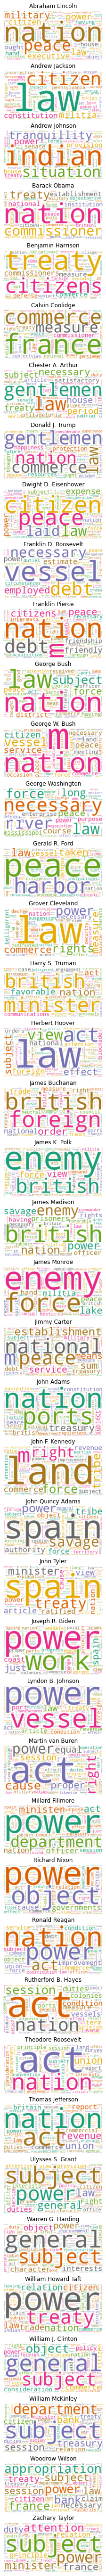

In [17]:
# Reset the output dimensions
plt.rcParams['figure.figsize'] = [100, 100]

full_names = []

# Creating subplots for each president
for index, president in enumerate(transposed_dtm.columns):
    full_names.append(president)
    wc.generate(data_clean.clean_text[index])
    
    plt.subplot(43, 1, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    

plt.savefig('figures/word_cloud.png', dpi=300)
plt.show()

### 2. Unique words

In [18]:
# Finding the number of unique words that each president uses
# Identifing the non-zero items in the document-term matrix, meaning that the word occurs at least once

unique_list = []
for president in transposed_dtm.columns:
    uniques = transposed_dtm[president].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['president_name', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort.head(15)

,president_name,unique_words
23,John Adams,1471
42,Zachary Taylor,1611
27,Joseph R. Biden,1725
22,Jimmy Carter,2096
13,George Washington,2106
37,Warren G. Harding,2331
14,Gerald R. Ford,2598
31,Richard Nixon,2695
35,Thomas Jefferson,2888
11,George Bush,2929


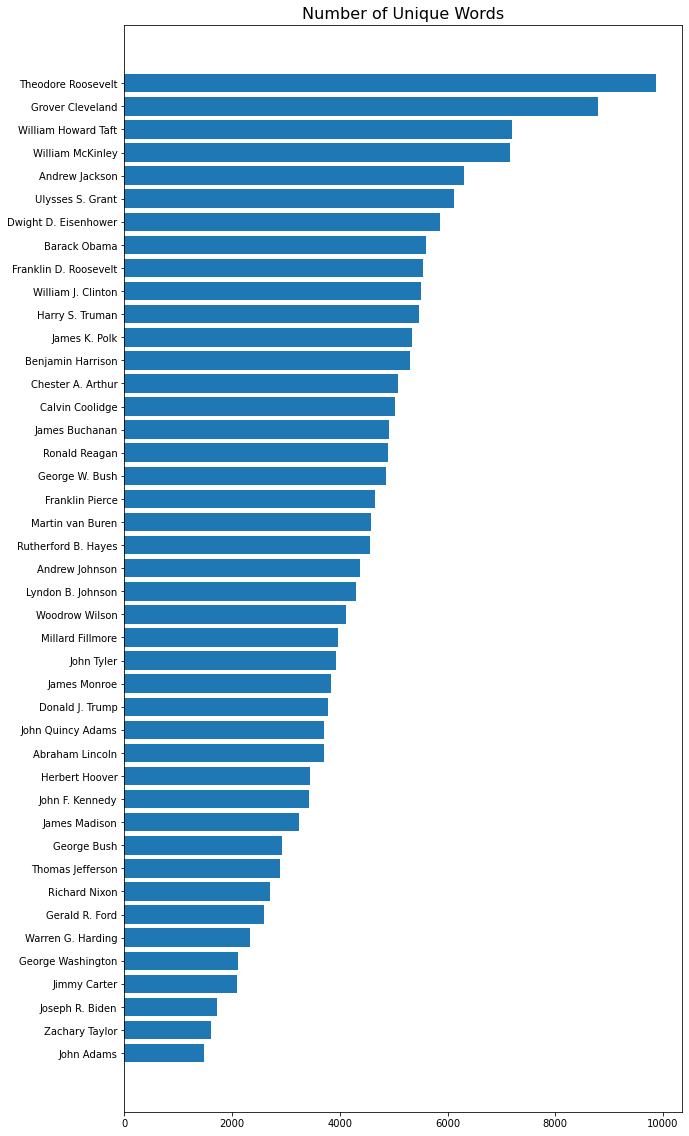

In [20]:
# Plotting results
plt.subplots(figsize=(10,20))
y_pos = np.arange(len(data_words))
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.president_name)
plt.title('Number of Unique Words', fontsize=16)

plt.savefig('figures/unique_words.png', dpi=600)